In [79]:
import numpy as np
from sklearn import datasets
from sklearn import model_selection
from nltk.corpus import stopwords 
import matplotlib.pyplot as plt

In [3]:
data=datasets.fetch_20newsgroups()

In [20]:
X=data.data
Y=data.target

In [23]:
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(X,Y,test_size=0.28,random_state=0)

In [26]:
Y_train.shape

(8146,)

In [27]:
Y_test.shape

(3168,)

In [41]:
new_X_train=[]
stops=set(stopwords.words('english'))
for line in X_train:
    for word in line.split():
        if word.lower() not in stops:
            new_X_train.append(word)

In [37]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [40]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [103]:
new_X_train

['From:',
 'leebr@ecf.toronto.edu',
 '(LEE',
 'BRIAN)',
 'Subject:',
 'Re:',
 'WP-PCF,',
 'Linux,',
 'RISC?',
 'Organization:',
 'University',
 'Toronto,',
 'Engineering',
 'Computing',
 'Facility',
 'Lines:',
 '67',
 'article',
 '<C5w9J7.JLL@Nyongwa.CAM.ORG>',
 'angcl@Nyongwa.CAM.ORG',
 '(Claude',
 'Angers)',
 'writes:',
 '>In',
 'article',
 '<C5rx8B.Kzp@ecf.toronto.edu>',
 'leebr@ecf.toronto.edu',
 '(LEE',
 'BRIAN)',
 'writes:',
 '>>In',
 'article',
 '<1qu8ud$2hd@sunb.ocs.mq.edu.au>',
 'eugene@mpce.mq.edu.au',
 'writes:',
 '>>>In',
 'article',
 '<C5o1yq.M34@csie.nctu.edu.tw>',
 'ghhwang@csie.nctu.edu.tw',
 '(ghhwang)',
 'writes:',
 '>>>>',
 '>>>>Dear',
 'friend,',
 '>>>>',
 'RISC',
 'means',
 '"reduced',
 'instruction',
 'set',
 'computer".',
 'RISC',
 'usually',
 '>>>>small',
 'instruction',
 'set',
 'reduce',
 'circuit',
 'complex',
 'increase',
 '>>>>the',
 'clock',
 'rate',
 'high',
 'performance.',
 'read',
 'books',
 '>>>>computer',
 'architecture',
 'information',
 'RISC.',
 '

In [104]:
dictionary={}
for value in new_X_train:
    if value in dictionary:
        dictionary[value]+=1
    else:
        dictionary[value]=1

In [133]:
for i in list(dictionary):
    if dictionary[i]==1 or dictionary[i]==2:
        del dictionary[i]

In [126]:
sorted_dictionary=sorted(dictionary.items(),key=lambda x: x[1],reverse=True)

In [108]:
sorted_dictionary

[('>', 19498),
 ('Subject:', 8357),
 ('From:', 8287),
 ('Lines:', 8157),
 ('Organization:', 7829),
 ('|', 7136),
 ('-', 6717),
 ('would', 6087),
 ('--', 5613),
 ('Re:', 5560),
 ('writes:', 5423),
 ('one', 4634),
 ('article', 4627),
 ('|>', 4572),
 ('like', 3684),
 (':', 3398),
 ('people', 3361),
 ('get', 3327),
 ('X', 3322),
 ('University', 3253),
 ('*', 3078),
 ('know', 3067),
 ('>>', 2963),
 ('think', 2876),
 ('1', 2677),
 ('use', 2620),
 ("I'm", 2373),
 ('also', 2307),
 ('could', 2199),
 ('good', 2006),
 ('2', 1987),
 ('even', 1918),
 ('may', 1904),
 ('make', 1879),
 ("MAX>'AX>'AX>'AX>'AX>'AX>'AX>'AX>'AX>'AX>'AX>'AX>'AX>'AX>'AX>'", 1839),
 ('Distribution:', 1832),
 ('Nntp-Posting-Host:', 1791),
 ('much', 1768),
 ('two', 1748),
 ('many', 1735),
 ('time', 1733),
 ('see', 1731),
 ('0', 1728),
 ('NNTP-Posting-Host:', 1675),
 ('it.', 1666),
 ('new', 1666),
 ('want', 1590),
 ('need', 1535),
 ('way', 1523),
 ('first', 1509),
 ('.', 1491),
 ('used', 1472),
 ('say', 1471),
 ('anyone', 1413),

okay then, make an np array out of the value part of the dictionary


In [134]:
np_vocab = np.array(list(dictionary.values()))
freq, counts = np.unique(np_vocab, return_counts = True)  # finding unique values in vocab and returning their count.
freq, counts

(array([    3,     4,     5,     6,     7,     8,     9,    10,    11,
           12,    13,    14,    15,    16,    17,    18,    19,    20,
           21,    22,    23,    24,    25,    26,    27,    28,    29,
           30,    31,    32,    33,    34,    35,    36,    37,    38,
           39,    40,    41,    42,    43,    44,    45,    46,    47,
           48,    49,    50,    51,    52,    53,    54,    55,    56,
           57,    58,    59,    60,    61,    62,    63,    64,    65,
           66,    67,    68,    69,    70,    71,    72,    73,    74,
           75,    76,    77,    78,    79,    80,    81,    82,    83,
           84,    85,    86,    87,    88,    89,    90,    91,    92,
           93,    94,    95,    96,    97,    98,    99,   100,   101,
          102,   103,   104,   105,   106,   107,   108,   109,   110,
          111,   112,   113,   114,   115,   116,   117,   118,   119,
          120,   121,   122,   123,   124,   125,   126,   127,   128,
      

like this 

then make a graph of frequency of a word versus the count

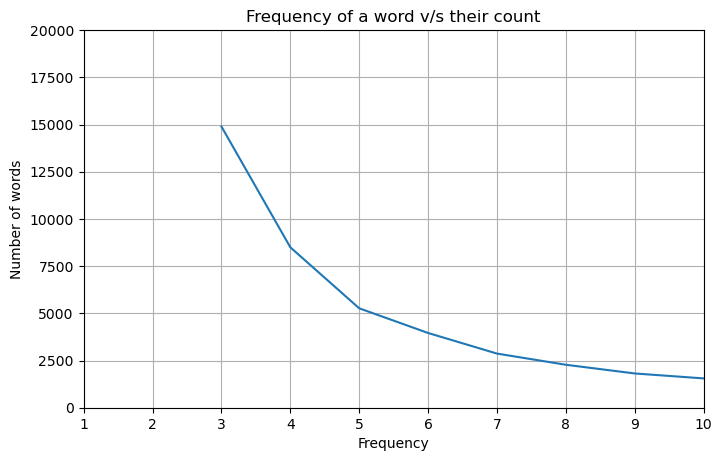

In [135]:
plt.figure(num=None, figsize=(8, 5), dpi=100, facecolor='w', edgecolor='green')
plt.plot(freq, counts)
# taking this axis to remove outliers and huge values and to get the curve 
plt.axis([1, 10, 0, 20000])
plt.title('Frequency of a word v/s their count')
plt.xlabel('Frequency')
plt.ylabel('Number of words')
plt.grid()
plt.show()

then we'll sort the dict  and make a list of features and append that vocab dictionary's keys

then represent training data as word vector count

In [137]:
def make_2D_data(data, features):
    data_final = np.zeros((len(data), len(features)))
    for i in range(len(data)):
        doc = data[i]
        for words in doc.split():
            word = words.strip(string.punctuation).lower()
            if word in features:
                data_final[i][features.index(word)] += 1
    return data_final

make the training and testing data using this function 

and make a dictionary which will store the string as key and the number rep that string as value

In [141]:
numeric = {}
Y_train = [] # this list contains updated y_train in int format

for i in range(1, len(set(Y_train)) + 1) : # making the range from 1 to the number of unique classes in output
    numeric[list(set(Y_train))[i-1]] = i

for i in range(len(Y_train)):
    Y_train.append(numeric[Y_train[i]])
    
Y_train

[]